In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/meteorite-data/Meteorite_Landings.csv


In [2]:
data=pd.read_csv('/kaggle/input/meteorite-data/Meteorite_Landings.csv')
data.head(5)

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
geoDf=gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data.reclong,data.reclat))
geoDf['mass']=geoDf['mass (g)']
geoDf=geoDf.drop(columns=['GeoLocation','mass (g)'])
geoDf=geoDf.dropna(axis='rows',subset=['reclat'])
geoDf['year']=geoDf['year'].astype('Int64')
geoDf.info()
geoDf.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 38401 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      38401 non-null  object  
 1   id        38401 non-null  int64   
 2   nametype  38401 non-null  object  
 3   recclass  38401 non-null  object  
 4   fall      38401 non-null  object  
 5   year      38223 non-null  Int64   
 6   reclat    38401 non-null  float64 
 7   reclong   38401 non-null  float64 
 8   geometry  38401 non-null  geometry
 9   mass      38282 non-null  float64 
dtypes: Int64(1), float64(3), geometry(1), int64(1), object(4)
memory usage: 3.3+ MB


name   id nametype     recclass  fall  year    reclat    reclong  \
0    Aachen    1    Valid           L5  Fell  1880  50.77500    6.08333   
1    Aarhus    2    Valid           H6  Fell  1951  56.18333   10.23333   
2      Abee    6    Valid          EH4  Fell  1952  54.21667 -113.00000   
3  Acapulco   10    Valid  Acapulcoite  Fell  1976  16.88333  -99.90000   
4   Achiras  370    Valid           L6  Fell  1902 -33.16667  -64.95000   

                      geometry      mass  
0     POINT (6.08333 50.77500)      21.0  
1    POINT (10.23333 56.18333)     720.0  
2  POINT (-113.00000 54.21667)  107000.0  
3   POINT (-99.90000 16.88333)    1914.0  
4  POINT (-64.95000 -33.16667)     780.0

In [6]:
geoDf['detClass']=geoDf['recclass']
geoDf.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim'],value='PA',inplace=True)

geoDf.recclass.replace(to_replace=['Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='AA',inplace=True)

geoDf.recclass.replace(to_replace=['Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)'],value='L',inplace=True)

geoDf.recclass.replace(to_replace=['Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','Martian (basaltic breccia)'],value='M',inplace=True)

geoDf.recclass.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an','CR7'],value='CC',inplace=True)

geoDf.recclass.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','L', 'L(?)3',
           'L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6',
           'L~3', 'L~4', 'L~5', 'L~6','Relict H','Relict OC','LL-melt breccia','H-melt breccia',
                                 'L5-melt breccia','LL-imp melt','H3.05','LL6-melt breccia',
                                 'LL3.05','H4-melt breccia','LL3.8-4','L3.00','L~4-6','LL6-an',
                                 'L4-melt breccia','LL(L)3.1','L3-melt breccia','H3.15'],value='OC',inplace=True)

geoDf.recclass.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6','EL-melt rock'],value='EC',inplace=True)

geoDf.recclass.replace(to_replace=['K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','R3.5-4'],value='AOC',inplace=True)

geoDf.recclass.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?'],value='P',inplace=True)

geoDf.recclass.replace(to_replace=['Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='MG',inplace=True)

geoDf.recclass.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB'],value='MIM',inplace=True)

geoDf.recclass.replace(to_replace=['Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?'],value='NMIM',inplace=True)

geoDf.recclass.replace(to_replace=['Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an','Howardite-an','C3.0-ung','Iron, IAB-sHL-an'],value='UN',inplace=True)


*     CC: Carbonaceous Chondrite
*     OC: Ordinary Chondrite
*     M: Martian
*     AA: Asteroidal Achondrites
*     PA: Primitive Achondrites
*     L: Lunar
*     EC: Enstatite Chondrite
*     AOC: Other Chondrite Groups(not in one of the major classes)
*     P: Pallasites
*     MG: Mesosiderite Group
*     MIM: Magmatic Iron Meteorite Groups
*     NMIM: Non-magmatic or Primitive Iron Meteorite Groups
*     UN: Not Enough Information (Ungrouped or Unknown)


In [7]:
geoDf.sample(5)

name     id nametype recclass   fall  year  \
16363            Hautes Fagnes  52854    Valid       OC  Found  1965   
25929      Miller Range 090852  56017    Valid       OC  Found  2009   
4185              Asuka 881144   3853    Valid       OC  Found  1988   
12183  Frontier Mountain 90053  10451    Valid       OC  Found  1990   
42273            Yamato 794018  28972    Valid       OC  Found  1979   

         reclat    reclong                     geometry    mass detClass  
16363  50.58333    6.16667     POINT (6.16667 50.58333)  185.00      LL5  
25929   0.00000    0.00000      POINT (0.00000 0.00000)   76.10       L6  
4185  -72.00000   26.00000   POINT (26.00000 -72.00000)  306.21       H4  
12183 -72.95506  160.43857  POINT (160.43857 -72.95506)    9.30       H5  
42273 -71.50000   35.66667   POINT (35.66667 -71.50000)    6.80       L6

<AxesSubplot:xlabel='recclass', ylabel='Count'>

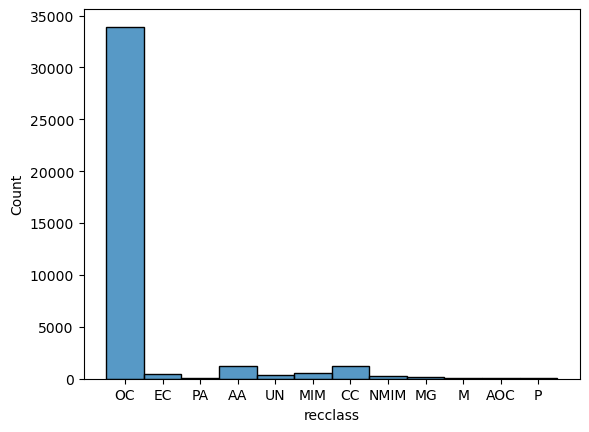

In [8]:
sns.histplot(data=geoDf,x='recclass')

about 90% of the recorded meteors are of OC category i.e Ordinary Chondrite

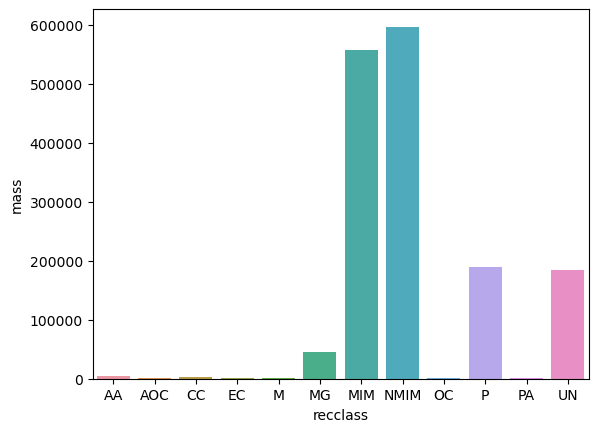

In [9]:
dt=geoDf.groupby(['recclass']).mean()
bar=sns.barplot(data=dt,x=dt.index,y='mass')

<AxesSubplot:xlabel='year', ylabel='mass'>

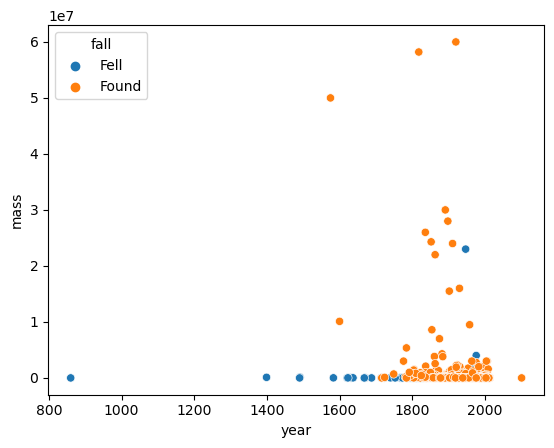

In [10]:
sns.scatterplot(data=geoDf,x='year',y='mass',hue='fall')

In [11]:
fig = px.scatter_mapbox(geoDf,
                    lat=geoDf.geometry.y,
                    lon=geoDf.geometry.x,
                    hover_name="name",
                    color=geoDf['fall'],
                    center=dict(lat=0, lon=0), zoom=0.7,
                    mapbox_style="open-street-map",)

fig.update_traces(marker=dict(size=5))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

A Large majority of South America is unscathed by meteor showers.

In [12]:
fig = px.density_mapbox(geoDf,
                    lat=geoDf.geometry.y,
                    lon=geoDf.geometry.x,
                    hover_name="name",
                    center=dict(lat=0, lon=0), zoom=0.7,
                    mapbox_style="stamen-terrain",
                    radius=3,height=700)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

With the heatmap of Meteor showers, we can easily see that USA, Oman, Nothern Counties of Africa and Southern part of Australia as well as some parts of Antarctica had a huge amount of meteor showers in the past and are more likely to have them again.

<AxesSubplot:>

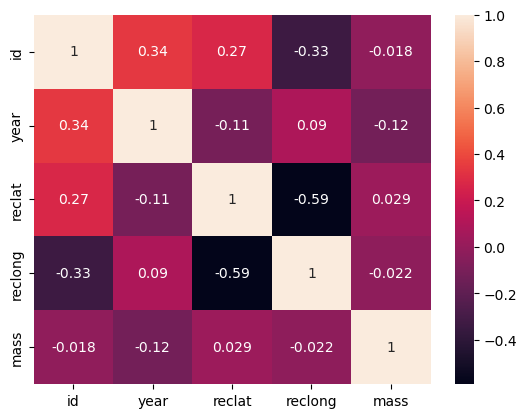

In [13]:
sns.heatmap(geoDf.corr(method='pearson'),annot=True)